# Business plan validation

## Objective:
This Experiment aims to verify the effectiveness of using a machine learning method using the KNN algorithm to validate from one point to another in the transport chain in the application domain, which is legal logging.

## Description:
Using data provided by IBAMA in the Open Data program (http://dadosabertos.ibama.gov.br/organization/instituto-brasileiro-do-meio-ambiente-e-dos-recursos-naturais-renovaveis) using 2 base fingers being these:
* Authorized Extraction / Transportation
* Manufacturing
Using as a parameter the time between the points and the validation of the DOF serial number used by ibama, two centroid clusters are drawn and these product ** validated legal ** and product ** validated **

## Data manipulation library: Pandas

In [1]:
import numpy
import pandas
import random

# 1. Collecting IBAMA Data


In [2]:
names_extracao = ["Nº de Série do DOF","Número do Trecho","Município Início","Município Fim","Tipo de Transporte","Placa(s)/Registro do Veículo","UF","RegistroEntrada"]

In [3]:
extracao = pandas.read_csv('extracao.csv', header=None, names=names_extracao,delimiter=";")

In [4]:
extracao

,Nº de Série do DOF,Número do Trecho,Município Início,Município Fim,Tipo de Transporte,Placa(s)/Registro do Veículo,UF,RegistroEntrada
0,668530,1,CRUZEIRO DO SUL/AC,CRUZEIRO DO SUL/AC,Rodoviario,MZO0581,AC,09/10/2019 11:00
1,424502,1,RODRIGUES ALVES/AC,CRUZEIRO DO SUL/AC,Rodoviario,MZN9222,AC,09/10/2019 11:00
2,549785,1,RIO BRANCO/AC,RIO BRANCO/AC,Rodoviario,MZZ4636,AC,09/10/2019 11:00
3,339788,1,CRUZEIRO DO SUL/AC,CRUZEIRO DO SUL/AC,Rodoviario,MZO0089,AC,09/10/2019 11:00
4,460049,1,SENA MADUREIRA/AC,RIO BRANCO/AC,Rodoviario,JZO0955,AC,09/10/2019 11:00
...,...,...,...,...,...,...,...,...
14608,572101,1,RIO BRANCO/AC,RIO BRANCO/AC,Rodoviario,MCJ9980,AC,09/10/2019 11:00
14609,642280,1,BUJARI/AC,RIO BRANCO/AC,Rodoviario,NBX7537,AC,09/10/2019 11:00
14610,566519,1,BUJARI/AC,PORTO ACRE/AC,Rodoviario,MZZ4636,AC,09/10/2019 11:00
14611,599381,1,RIO BRANCO/AC,RIO BRANCO/AC,Rodoviario,NCR3630,AC,09/10/2019 11:00


In [5]:
names_transporte = ["Nome/Razão Social do Remetente","CPF/CNPJ do Remetente","UF de Origem","Município de Origem","CTF do Remetente","Tipo de Origem","Nome do Pátio de Origem","Nº de Série da Autex","Nº da Autorização Original","Tipo de Autex","Órgão Emissor da Autex","Data de Validade da Autex","Nº da DI","Órgão Emissor da DI","Data de Validade da DI","Nome Porto de Entrada no País","País de Origem","Nº da Autesp","Órgão Emissor da Autesp","Data de Validade da Autesp","Latitude de Origem","Longitude de Origem","UF de Destino","Município de Destino","Nome/Razão Social Destinatário","CPF/CNPJ do Destinatário","CTF do Destinatário","Nome Pátio de Destino","Latitude do Destino","Longitude do Destino","Nome Porto de Saída do País","Município do Porto","UF do Porto","País de Destino","Data de Emissão","Ano","Validade Inicial","Validade Final","Última Transação","Data da Última Transação","Nº da Oferta","Nº de Série do DOF","Código de Controle do DOF","Rota do Transporte","Produto","Nome Científico","Nome Popular","Unidade","Volume","Valor (R$)","RegistroEntrada"]

In [6]:
transporte = pandas.read_csv('transporte.csv', header=None, names=names_transporte,delimiter=";")

In [7]:
transporte.head()

,Nome/Razão Social do Remetente,CPF/CNPJ do Remetente,UF de Origem,Município de Origem,CTF do Remetente,Tipo de Origem,Nome do Pátio de Origem,Nº de Série da Autex,Nº da Autorização Original,Tipo de Autex,...,Nº de Série do DOF,Código de Controle do DOF,Rota do Transporte,Produto,Nome Científico,Nome Popular,Unidade,Volume,Valor (R$),RegistroEntrada
0,LAMINADOS TRIUNFO LTDA,05.618.631/0001-92,AC,SENA MADUREIRA,302980,AUTEX-Exploração em Planos de Manejo,FAZENDA CEREJEIRA,2.200703e+09,12012200700009,AUTEX-Exploração em Planos de Manejo,...,613367,5129232999151425,SENA MADUREIRA/AC-RIO BRANCO/AC,Tora,Scheffleramorototoni,Morototó,M3,"2,391","47,82",17/09/2019 09:39
1,LAMINADOS TRIUNFO LTDA,05.618.631/0001-92,AC,SENA MADUREIRA,302980,AUTEX-Exploração em Planos de Manejo,FAZENDA CEREJEIRA,2.200703e+09,12012200700009,AUTEX-Exploração em Planos de Manejo,...,613367,5129232999151425,SENA MADUREIRA/AC-RIO BRANCO/AC,Tora,Hirtellainsignis,Macuco,M3,"3,492","69,85",17/09/2019 09:39
2,LAMINADOS TRIUNFO LTDA,05.618.631/0001-92,AC,SENA MADUREIRA,302980,AUTEX-Exploração em Planos de Manejo,FAZENDA CEREJEIRA,2.200703e+09,12012200700009,AUTEX-Exploração em Planos de Manejo,...,613367,5129232999151425,SENA MADUREIRA/AC-RIO BRANCO/AC,Tora,Tabebuiaserratifolia,Ipê,M3,"1,555","31,1",17/09/2019 09:39
3,LAMINADOS TRIUNFO LTDA,05.618.631/0001-92,AC,SENA MADUREIRA,302980,AUTEX-Exploração em Planos de Manejo,FAZENDA CEREJEIRA,2.200703e+09,12012200700009,AUTEX-Exploração em Planos de Manejo,...,613367,5129232999151425,SENA MADUREIRA/AC-RIO BRANCO/AC,Tora,Cedrelaodorata,Cedro,M3,"1,551","31,02",17/09/2019 09:39
4,LAMINADOS TRIUNFO LTDA,05.618.631/0001-92,AC,SENA MADUREIRA,302980,AUTEX-Exploração em Planos de Manejo,FAZENDA CEREJEIRA,2.200703e+09,12012200700009,AUTEX-Exploração em Planos de Manejo,...,613367,5129232999151425,SENA MADUREIRA/AC-RIO BRANCO/AC,Tora,Thyrsodiumschomburgkianum,Catuaba,M3,"3,078","61,57",17/09/2019 09:39


## Including library used for Kmeans allogorithms

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D

### Preprocessing

In [9]:

extracao['RegistroEntrada']= extracao['RegistroEntrada'].astype('datetime64[ns]') 


In [10]:
lista = [pandas.Timestamp(year=2019, month=9, day=25, hour=12, minute=50)
        ,pandas.Timestamp(year=2019, month=11, day=2, hour=15, minute=39)
        ,pandas.Timestamp(year=2019, month=9, day=27, hour=11, minute=42)
        ,pandas.Timestamp(year=2019, month=10, day=28, hour=17, minute=34)
        ,pandas.Timestamp(year=2019, month=9, day=27, hour=18, minute=12)]

In [11]:
for row in range(extracao.shape[0]-10000):
    extracao.at[row,"RegistroEntrada"] = random.choice(lista)

In [12]:

transporte['RegistroEntrada'] = transporte['RegistroEntrada'].astype('datetime64[ns]') 


lista = [pandas.Timestamp(year=2019, month=9, day=10, hour=9, minute=39)
        ,pandas.Timestamp(year=2019, month=8, day=12, hour=10, minute=39)
        ,pandas.Timestamp(year=2019, month=9, day=19, hour=11, minute=39)
        ,pandas.Timestamp(year=2019, month=10, day=13, hour=7, minute=39)
        ,pandas.Timestamp(year=2019, month=9, day=13, hour=6, minute=39)]

for row in range(transporte.shape[0]-10000):
    transporte.at[row,"RegistroEntrada"] = random.choice(lista)



In [13]:
lista = [pandas.Timestamp(year=2019, month=10, day=26, hour=10, minute=40)
        ,pandas.Timestamp(year=2019, month=11, day=27, hour=9, minute=39)
        ,pandas.Timestamp(year=2019, month=10, day=25, hour=12, minute=12)
        ,pandas.Timestamp(year=2019, month=12, day=27, hour=7, minute=10)
        ,pandas.Timestamp(year=2019, month=12, day=25, hour=7, minute=9)]

In [14]:
for row in range(transporte.shape[0]-32000):
    transporte.at[row,"RegistroEntrada"] = random.choice(lista)

In [15]:
recorte_extracao = extracao.drop(["Número do Trecho","Município Início","Município Fim","Tipo de Transporte","Placa(s)/Registro do Veículo","UF"], axis=1)

In [16]:
recorte_transporte = transporte.drop( ["Nome/Razão Social do Remetente","CPF/CNPJ do Remetente","UF de Origem","Município de Origem","CTF do Remetente","Tipo de Origem","Nome do Pátio de Origem","Nº de Série da Autex","Nº da Autorização Original","Tipo de Autex","Órgão Emissor da Autex","Data de Validade da Autex","Nº da DI","Órgão Emissor da DI","Data de Validade da DI","Nome Porto de Entrada no País","País de Origem","Nº da Autesp","Órgão Emissor da Autesp","Data de Validade da Autesp","Latitude de Origem","Longitude de Origem","UF de Destino","Município de Destino","Nome/Razão Social Destinatário","CPF/CNPJ do Destinatário","CTF do Destinatário","Nome Pátio de Destino","Latitude do Destino","Longitude do Destino","Nome Porto de Saída do País","Município do Porto","UF do Porto","País de Destino","Data de Emissão","Ano","Validade Inicial","Validade Final","Última Transação","Data da Última Transação","Nº da Oferta","Código de Controle do DOF","Rota do Transporte","Produto","Nome Científico","Nome Popular","Unidade","Volume","Valor (R$)",], axis=1)

In [17]:
entradas_extracao = []
for row in range(recorte_extracao.shape[0]):
    entradas_extracao.append(recorte_extracao.loc[row,"RegistroEntrada"])

In [18]:
entradas_transporte = []
for row in range(recorte_extracao.shape[0]):
    entradas_transporte.append(recorte_transporte.loc[row,"RegistroEntrada"])

In [19]:
tempo_transporte = []
for row in range(recorte_extracao.shape[0]):
    tempo_transporte.append((entradas_transporte[row] - entradas_extracao[row]))
tempo = []
for row in range(recorte_extracao.shape[0]):
    tempo.append(tempo_transporte[row].days)

In [20]:
distancias = pandas.DataFrame(data=tempo, columns =["tempo"], index = recorte_extracao["Nº de Série do DOF"])
distancias

,tempo
Nº de Série do DOF,
668530,60
424502,29
549785,52
339788,62
460049,30
...,...
572101,-30
642280,-30
566519,32


### Using the sklearn.cluster.Kmaens library and as suggested 2 clusters to define

In [21]:
kmaens = KMeans(n_clusters= 2, random_state=0).fit(distancias.values)

### The groups generated by Kmeans-3 are presented.

In [22]:
grupos = pandas.DataFrame()
grupos['Série DOF'] = distancias.index.values
grupos['Grupos'] = kmaens.labels_
grupos.sort_values(by=['Grupos'])

,Série DOF,Grupos
0,668530,0
4618,646009,0
4617,620222,0
4616,602406,0
4615,605721,0
...,...,...
7709,620915,1
7710,554929,1
7711,463721,1
7733,590854,1


#### Group 0 (Not Validated):
These are those with similar time rates on delivery to and from the nearby extraction point, and have been verified by the recipient.
#### Group 1 (Validated):
These are those with similar time rates on delivery to and from the nearby extraction point, and have not been verified by the recipient due to delays.

### Generating the data in dimension 2, the 2 vectors were obtained with the fit_transform method.

In [23]:
axes =kmaens.fit(distancias).transform(distancias)
axes

array([[13.72908835, 54.48276528],
       [44.72908835, 23.48276528],
       [21.72908835, 46.48276528],
       ...,
       [41.72908835, 26.48276528],
       [71.72908835,  3.51723472],
       [41.72908835, 26.48276528]])

In [24]:
axes1 = []
for i in range(len(axes)):
    axes1.append(axes[i][0])
axes2 = []
for i in range(len(axes)):
    axes2.append(axes[i][1])


<function matplotlib.pyplot.show(*args, **kw)>

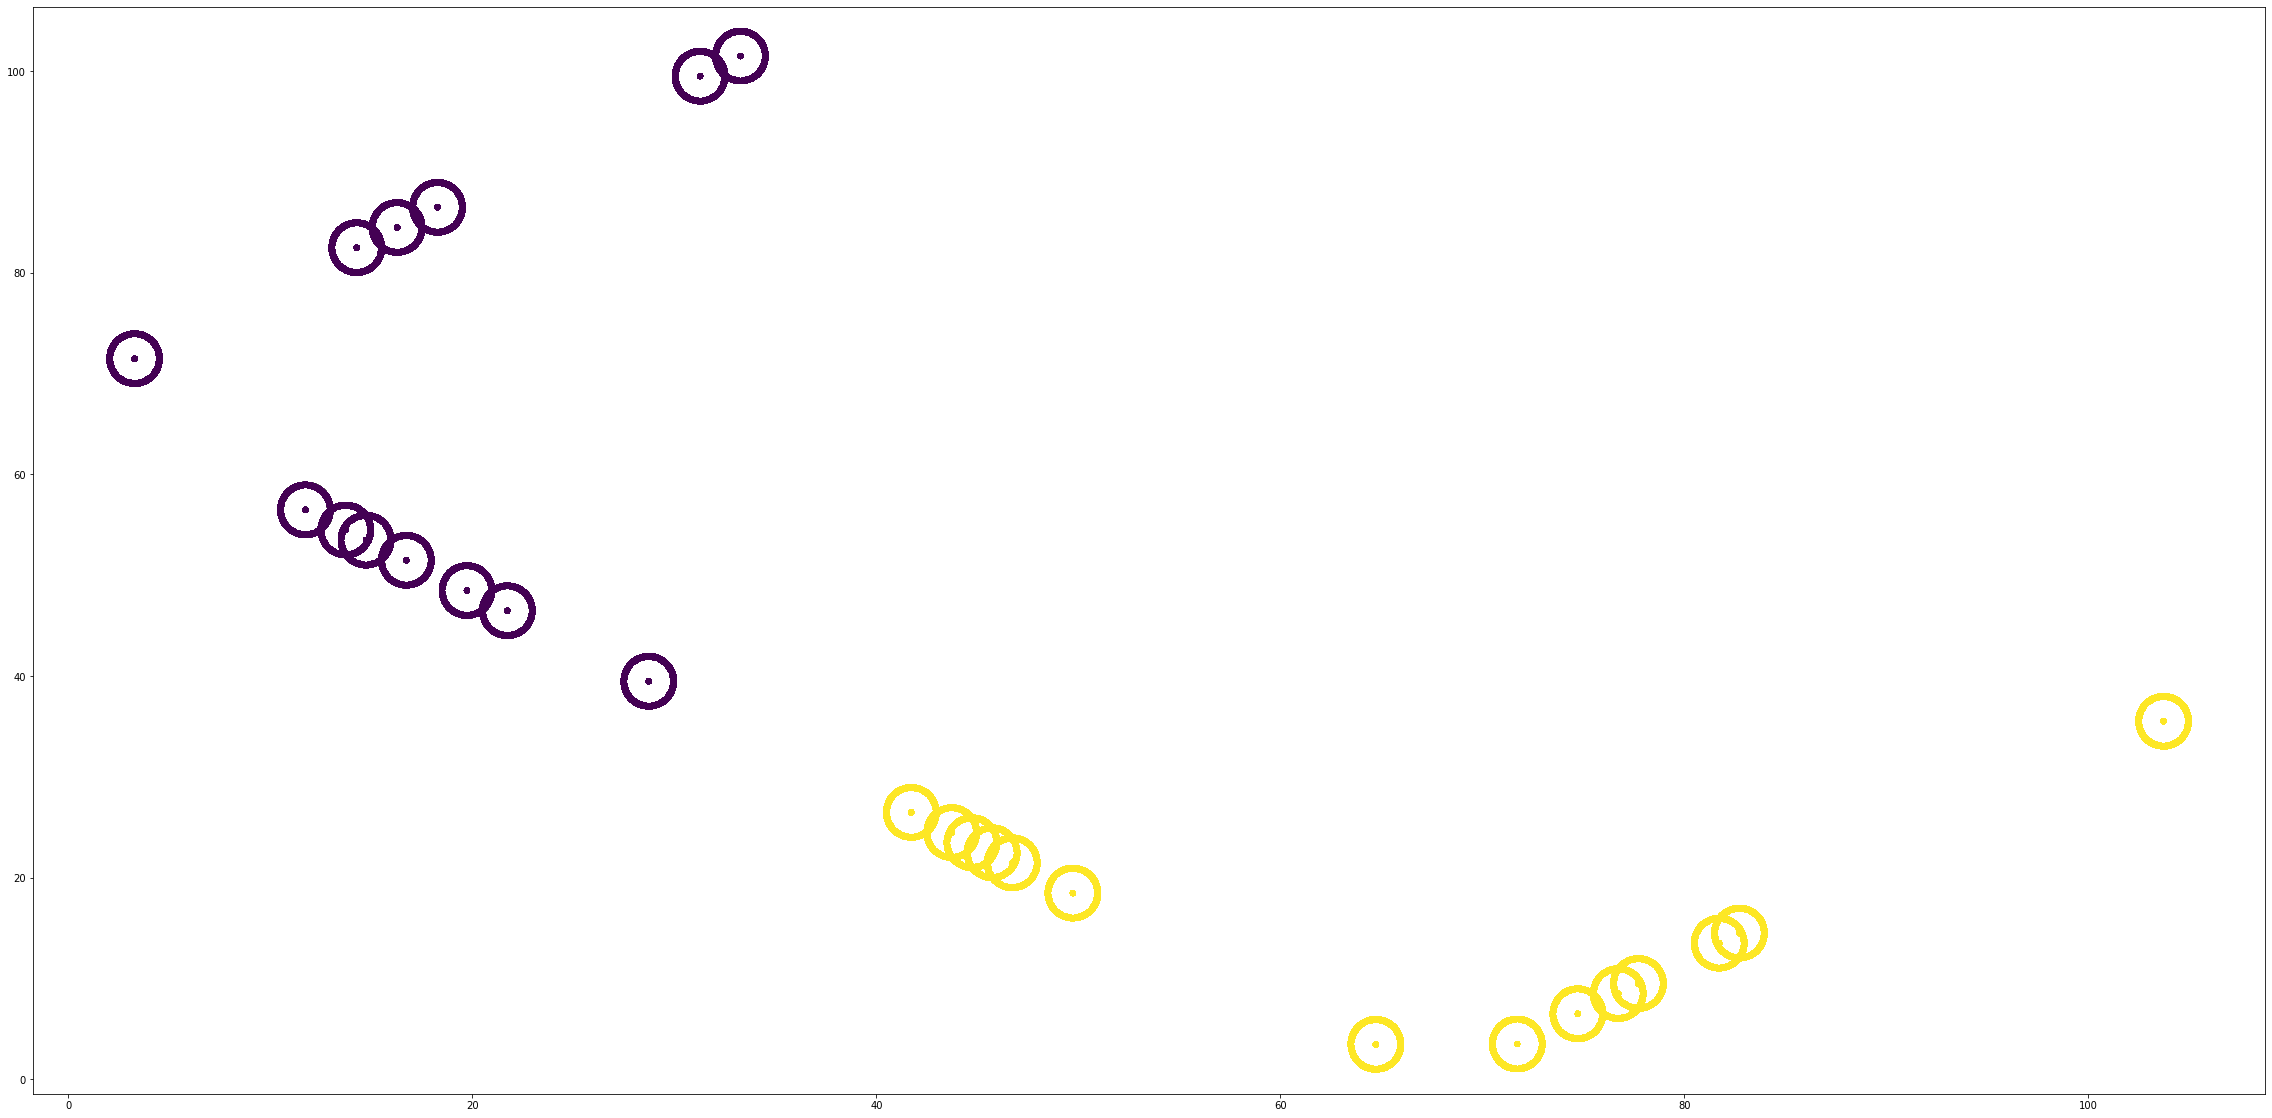

In [25]:
fig = plt.figure(figsize=(40, 20))
plt.scatter(axes1,axes2, c=kmaens.labels_, linewidths=50 )
plt.show